<a href="https://colab.research.google.com/github/sergioarnold87/Practica_Sergio/blob/main/Muestreo_Thompson_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Damos acceso a nuestro Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Muestreo *Thompson*

In [3]:
# Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Dataset
dataset = pd.read_csv("/content/drive/MyDrive/Datasets/Ads_CTR_Optimisation.csv")

In [7]:
# Algoritmo de Muestreo de Thompson
import random
N = 10000
d = 10
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
ads_selected = []
total_reward = 0
for n in range(0,N):
    max_random = 0
    ad = 0
    for i in range(0, d):
        random_beta = random.betavariate(number_of_rewards_1[i]+1, number_of_rewards_0[i]+1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        number_of_rewards_1[ad] = number_of_rewards_1[ad] + 1
    else:
        number_of_rewards_0[ad] = number_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

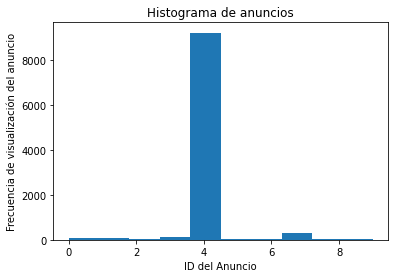

In [8]:
plt.hist(ads_selected)
plt.title("Histograma de anuncios")
plt.xlabel("ID del Anuncio")
plt.ylabel("Frecuencia de visualización del anuncio")
plt.show()